In [39]:
from catboost import Pool, CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import shap
import numpy as np
import os

In [40]:
path_to_data = os.path.join(os.path.expanduser('~'), "Documents/CatTheory/CO2RR_selectivity_ML/Data/Datasets/BSc/smogn")

df = pd.read_csv(path_to_data + "/smogn_HCOOH", index_col=False)

X = df.iloc[:,1:8]
y = df.iloc[:,-1]

In [41]:
model = CatBoostRegressor(rsm=1, learning_rate=0.3, depth=2, l2_leaf_reg=4, iterations=300, bagging_temperature=10, loss_function='RMSEWithUncertainty',verbose=False, random_seed=0)

train_pool = Pool(X, y)

# Training the model
model.fit(train_pool)

In [42]:
H_upper = X['H*'].max()
H_lower = X['H*'].min()


grid = []

for j in np.linspace(H_lower - 1, H_upper + 1, 1000):
    X_test = {'Vnhe': df['Vnhe'].mean(), 'H*': j, 'CO*': -0.7, 'OCCOH*': df['OCCOH*'].mean(), 'OH*': df['OH*'].mean(), 'O*': df['O*'].mean(), 'C*': df['C*'].mean()}

    test_df = pd.DataFrame([X_test])

    prediction = model.predict(test_df)[0]
    #print(f'H*: {i}, CO*: {j}')
    #print(prediction)

    grid.append((j, prediction[0], prediction[1]))

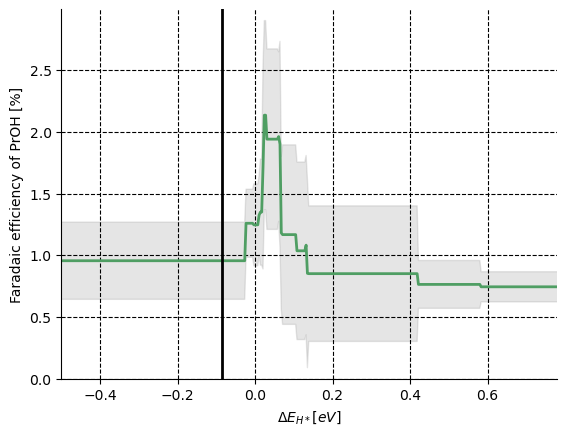

In [43]:
# plt.scatter([i[0] for i in grid], [i[1] for i in grid])
x = [i[0] for i in grid]
y = [i[1] for i in grid]
uncertainty = [2 * np.sqrt(i[2]) for i in grid]



#sns.lineplot(x=[i[0] for i in grid], y=[i[1] for i in grid])



# Calculating the upper and lower bounds for the uncertainty
y_lower = np.array(y) - np.array(uncertainty)
y_upper = np.array(y) + np.array(uncertainty)

# Create the plot
sns.lineplot(x=x, y=y, color='#4f9e63', lw=2)
plt.fill_between(x, y_lower, y_upper, color='gray', alpha=0.2)
plt.grid(color='black', linestyle='--')
plt.xlabel('$\Delta E_{H*} [eV]$')
plt.ylabel('Faradaic efficiency of PrOH [%]')
plt.ylim((0,2.99))
plt.xlim((-0.5,0.78))
plt.plot([-0.08429,-0.08429],[-5,5],'k',lw=2)
plt.gca().spines[['right', 'top']].set_visible(False) 

path_to_figs = os.path.join(os.path.expanduser('~'), "Dropbox/Apps/Overleaf/bsc_project/graphics/")

plt.savefig(path_to_figs + 'constant_extrapolation.pdf')

plt.show()


In [17]:
x

[-1.4594891448574514,
 -1.4561183761524192,
 -1.4527476074473873,
 -1.4493768387423551,
 -1.4460060700373232,
 -1.442635301332291,
 -1.4392645326272588,
 -1.435893763922227,
 -1.4325229952171947,
 -1.4291522265121626,
 -1.4257814578071306,
 -1.4224106891020984,
 -1.4190399203970665,
 -1.4156691516920343,
 -1.4122983829870022,
 -1.4089276142819702,
 -1.405556845576938,
 -1.4021860768719059,
 -1.398815308166874,
 -1.3954445394618418,
 -1.3920737707568098,
 -1.3887030020517777,
 -1.3853322333467455,
 -1.3819614646417135,
 -1.3785906959366814,
 -1.3752199272316492,
 -1.3718491585266173,
 -1.368478389821585,
 -1.3651076211165531,
 -1.361736852411521,
 -1.3583660837064888,
 -1.3549953150014569,
 -1.3516245462964247,
 -1.3482537775913925,
 -1.3448830088863606,
 -1.3415122401813284,
 -1.3381414714762965,
 -1.3347707027712643,
 -1.3313999340662321,
 -1.3280291653612002,
 -1.324658396656168,
 -1.3212876279511359,
 -1.317916859246104,
 -1.3145460905410717,
 -1.3111753218360398,
 -1.30780455313100

In [8]:
H_upper

0.9079087914696004